In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

The box was tested from node C to the other two nodes because it was suspected that there is a diode at node C

In [154]:
class Diode(object):
    def __init__(self, datafile=None, data=None):
        if data == None:
            data = np.genfromtxt(datafile, delimiter=',')
        
        data.sort(axis=0)
        self.data = data
        self.volts = data[:,0]
        self.amps  = data[:,1]
        self.figure_created = False
        self.fig, self.ax = plt.subplots()
        
    def figure(self, size=(10,10), location='upper left', fit=False, above_breakdown = False, data=None):
        if not self.figure_created:
            if above_breakdown:
                V = self.volts[self.amps > 0]
                I  = self.amps[self.amps > 0]
                
            V, I = self.volts, self.amps
            
            
            if data is not None:
                V = data[:,0]
                I = data[:,1]
                
            self.fig.set_size_inches(size)
            self.plot_points = self.ax.scatter(V, I, label="V-I of Diode")
            self.ax.set_xlabel("Voltage ($V$)")
            self.ax.set_ylabel("Current ($A$)")
            
            if fit and above_breakdown:
                line = linregress(V, I)
                fit_current = V * line.slope + line.intercept
                
                self.line_fit = self.ax.plot(V, fit_current, '--', color='orange', 
                                             label=r"$V$ = {} $\cdot i$ + ({})"
                                             .format(np.round(line.slope, 3), np.round(line.intercept, 3)))

            self.ax.legend(loc=location)
            self.figure_created = True
            
        return self.fig, self.ax
    
    @property
    def rev_breakdown(self):
        """
        Return breakdown voltage in Volts as the first voltage where current is nonzero
        """
        current_limit = np.where(self.amps == 0)[0][-1]
        breakdown_voltage = self.volts[current_limit+1]
        
        return breakdown_voltage
    
    @property
    def resistance(self):
        """
        Return the resistance of the diode after breakdown voltage
        """
        volts = self.volts[self.amps > 0]
        amps  = self.amps[self.amps > 0]
        
        return volts/amps
    
    def refresh_figure(self, *args, **kwargs):
        self.ax.cla()
        self.figure_created = False
        return self.figure(*args, **kwargs)

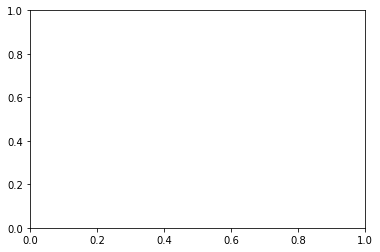

In [152]:
C_to_B = Diode(datafile='C-to-B.csv')

In [164]:
fig = C_to_B.refresh_figure()[0]
fig.savefig('Report/Figures/CtoB.png')

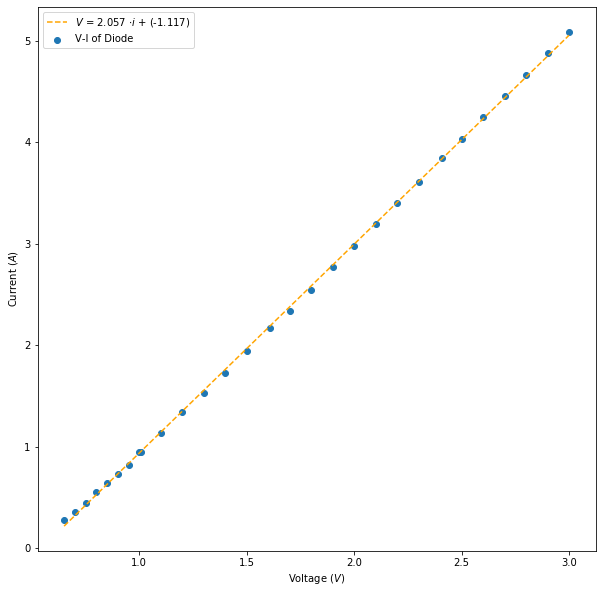

In [165]:
new_data = C_to_B.data[C_to_B.amps > 0][5:]
fig = C_to_B.refresh_figure(fit=True, above_breakdown=True, data=new_data)[0]
fig.savefig('Report/Figures/CtoB_above_breakdown.png')
fig

In [54]:
C_to_B.resistance
np.average(C_to_B.resistance)

2.838122012967678

In [51]:
dV = np.gradient(C_to_B.volts[C_to_B.amps > 0])
dI = np.gradient(C_to_B.amps[C_to_B.amps > 0])

R = dV/dI

In [53]:
R
np.average(R)

0.6200474705535584

In [70]:
scp.linregress

AttributeError: module 'scipy' has no attribute 'linregress'

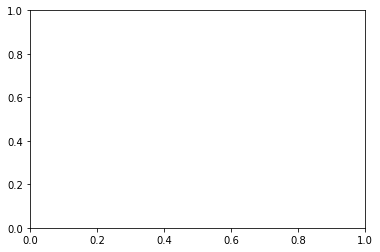

In [155]:
CtoA = Diode('C-to-A.csv')

In [162]:
fig = CtoA.refresh_figure()[0]
fig.savefig('Report/Figures/CtoA.png')

In [163]:
CtoA.rev_breakdown

0.4

<ipython-input-168-3f6280f39e3f>:1: RuntimeWarning: invalid value encountered in greater
  new_data = CtoA.data[CtoA.amps > 0][5:]
<ipython-input-154-fe163663b8a8>:16: RuntimeWarning: invalid value encountered in greater
  V = self.volts[self.amps > 0]
<ipython-input-154-fe163663b8a8>:17: RuntimeWarning: invalid value encountered in greater
  I  = self.amps[self.amps > 0]


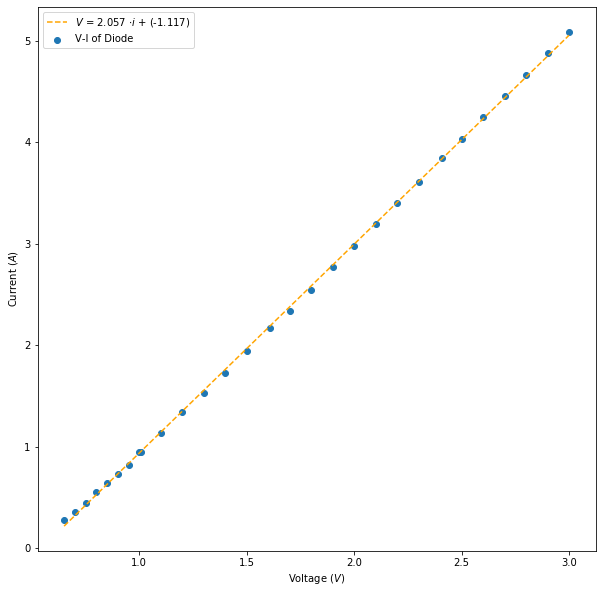

In [168]:
new_data = CtoA.data[CtoA.amps > 0][5:]
fig = CtoA.refresh_figure(fit=True, above_breakdown=True, data=new_data)[0]
fig.savefig('Report/Figures/CtoA_above_breakdown.png')
fig